# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def load_image(path):
    return plt.imread(path)

## Problem 1: Getting to know Python (5 Points)

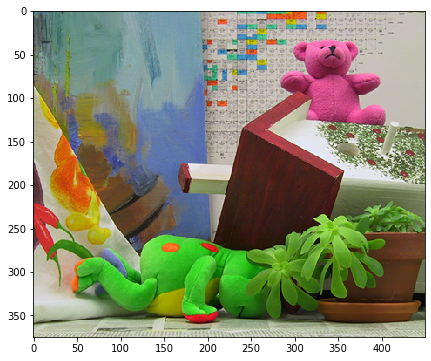

In [3]:
from problem1 import *

img = load_image("data/a1p1.png")
display_image(img)

save_as_npy("a1p1.npy", img)

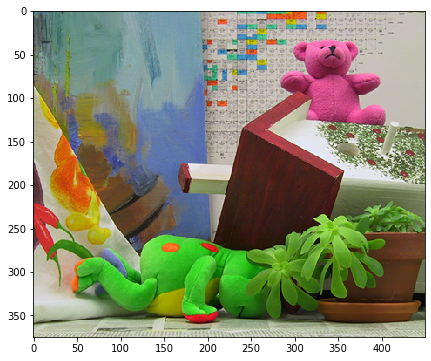

In [4]:
img1 = load_npy("a1p1.npy")
display_image(img1)

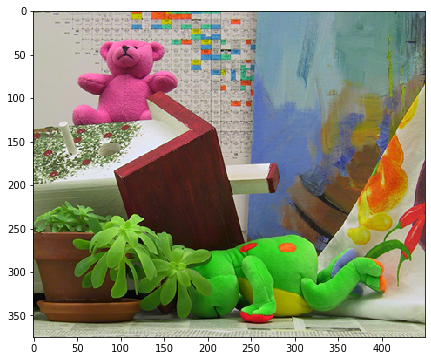

In [5]:
img2 = mirror_horizontal(img1)
display_image(img2)

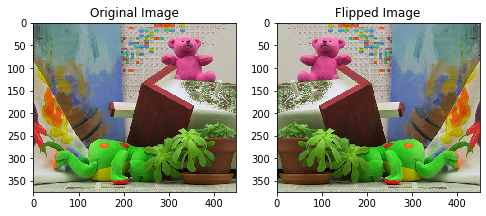

In [6]:
display_images(img1, img2)

## Problem 2: Bayer Interpolation (10 Points)

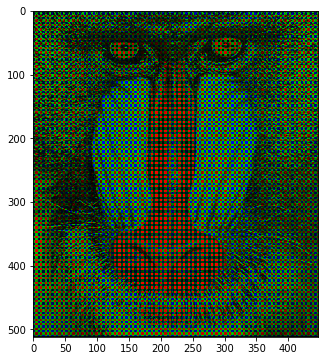

In [7]:
from problem2 import *

data = loaddata("data/bayerdata.npy")
r, g, b = separatechannels(data)

img = assembleimage(r, g, b)
display_image(img)

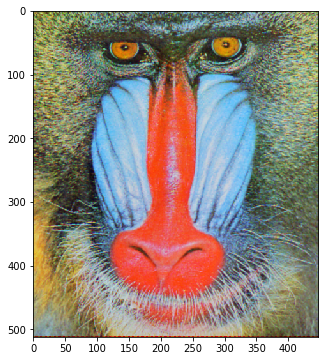

In [10]:
img_interpolated = interpolate(r, g, b)
display_image(img_interpolated)

## Problem 3: Projective Transformation (10 Points)

In [42]:
from problem3 import *

t = np.array([-27.1, -2.9, -3.2])
principal_point = np.array([8, -10])
focal_length = 8

# model transformations
T = gettranslation(t)
Ry = getyrotation(135)
Rx = getxrotation(-30)
Rz = getzrotation(90)
print(T)
print(Ry)
print(Rx)
print(Rz)

[[  1.    0.    0.  -27.1]
 [  0.    1.    0.   -2.9]
 [  0.    0.    1.   -3.2]
 [  0.    0.    0.    1. ]]
[[-0.70710678  0.          0.70710678  0.        ]
 [ 0.          1.          0.          0.        ]
 [-0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 1.         0.         0.         0.       ]
 [ 0.         0.8660254  0.5        0.       ]
 [ 0.        -0.5        0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 6.123234e-17 -1.000000e+00  0.000000e+00  0.000000e+00]
 [ 1.000000e+00  6.123234e-17  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


In [43]:
K = getcentralprojection(principal_point, focal_length)

P,M = getfullprojection(T, Rx, Ry, Rz, K)
print(P)
print(M)

[[ -2.07055236 -10.92820323  -2.07055236  94.4295259 ]
 [  0.46687011   5.          11.78057861 -64.85003145]
 [ -0.61237244  -0.5         -0.61237244  20.0048848 ]]
[[ 3.53553391e-01 -8.66025404e-01  3.53553391e-01 -8.20119406e+00]
 [-7.07106781e-01  5.30287619e-17  7.07106781e-01  1.68998521e+01]
 [-6.12372436e-01 -5.00000000e-01 -6.12372436e-01  2.00048848e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


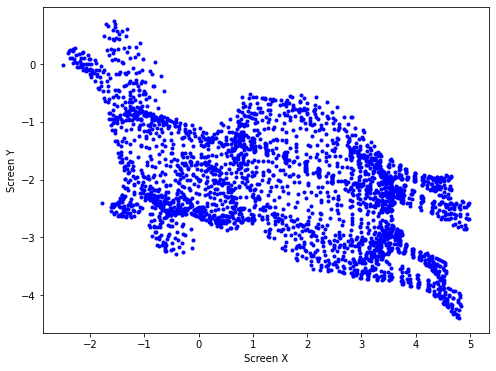

In [44]:
points = loadpoints()
z = loadz()
displaypoints2d(points)

(2, 2904)


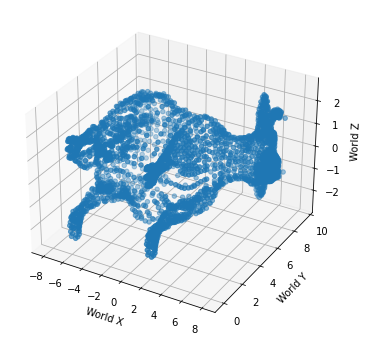

In [45]:
Xt = invertprojection(K, points, z)

Xh = inverttransformation(M, Xt)

worldpoints = hom2cart(Xh)
displaypoints3d(worldpoints)

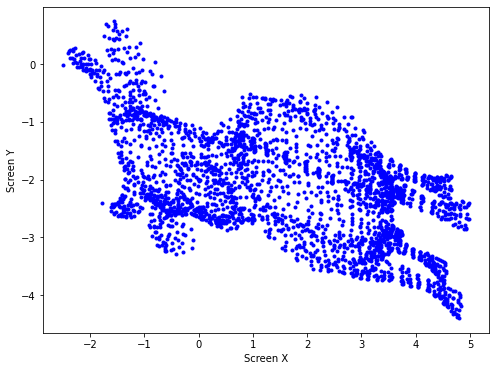

In [46]:
points2 = projectpoints(P, worldpoints)
displaypoints2d(points2)

## Problem 4: Image Filtering and Edge Detection (15 Points)

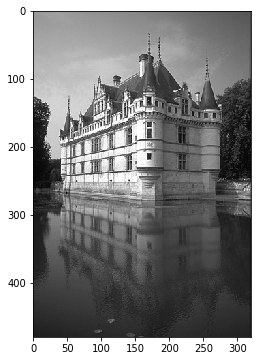

In [19]:
from problem4 import *

# load image
img = plt.imread("data/a1p4.png")
plt.imshow(img)
plt.show()

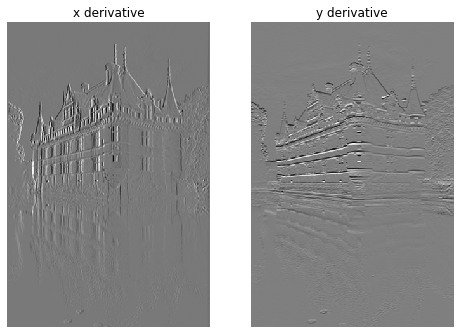

In [20]:
# create filters
fx, fy = createfilters()

# filter image
imgx, imgy = filterimage(img, fx, fy)

# show filter results
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(imgx, "gray", interpolation="none")
ax1.set_title("x derivative")
ax1.axis("off")
ax2 = plt.subplot(122)
ax2.imshow(imgy, "gray", interpolation="none")
ax2.set_title("y derivative")
ax2.axis("off")
plt.show()

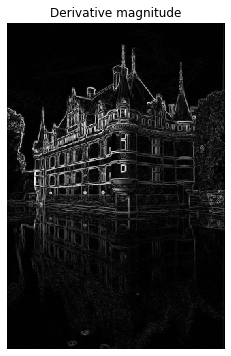

In [21]:
# show gradient magnitude
plt.figure()
plt.imshow(np.sqrt(imgx**2 + imgy**2), "gray", interpolation="none")
plt.axis("off")
plt.title("Derivative magnitude")
plt.show()

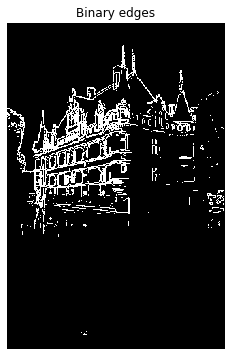

In [23]:
# threshold derivative
threshold = 0.1
edges = detectedges(imgx,imgy,threshold)
plt.figure()
plt.imshow(edges > 0, "gray", interpolation="none")
plt.axis("off")
plt.title("Binary edges")
plt.show()

In [ ]:
# non maximum suppression
edges2 = nonmaxsupp(edges,imgx,imgy)
plt.figure()
plt.imshow(edges2 > 0, "gray", interpolation="none")
plt.axis("off")
plt.title("Non-maximum suppression")